In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#importing the data
df = pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv")
#removing the columns with atleast one nan values
df = df.dropna(axis=1)
#removing the rows with all nan values
df = df.dropna(axis=0,how= 'all')
df.head()

C:\Users\Anshu\AppData\Local\Temp\ipykernel_25104\1264235185.py:2: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv")


,player_id,match_id,gender,balls_per_over,start_date,match_type,name_x,runs_scored,player_out,balls_faced,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,T20,M King,10,1,30,...,0,0,0,0,0,Sierra Leone,Namibia,5,8,17
1,00015688,1182644,female,6,2019-05-05,T20,M King,8,1,18,...,0,0,0,0,0,Sierra Leone,Uganda,3,0,7
2,00015688,1275107,female,6,2021-09-09,T20,M King,1,0,5,...,0,0,0,0,0,Sierra Leone,Nigeria,1,0,5
3,00015688,1275113,female,6,2021-09-15,T20,M King,0,0,0,...,0,0,0,0,0,Sierra Leone,Cameroon,0,0,4
4,00015688,1275125,female,6,2021-09-14,T20,M King,1,1,15,...,0,0,0,0,0,Sierra Leone,Uganda,-5,0,-1


In [6]:
#t_20
df_t20 = df[df['match_type'] == 'T20']
df_t20 = df_t20.drop(columns=['match_type'])
df_t20 = df_t20.set_index('player_id')
df_t20.head()

,match_id,gender,balls_per_over,start_date,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
player_id,,,,,,,,,,,,,,,,,,,,,
00015688,1158348,female,6,2018-08-21,M King,10,1,30,1,0,...,0,0,0,0,0,Sierra Leone,Namibia,5,8,17
00015688,1182644,female,6,2019-05-05,M King,8,1,18,1,0,...,0,0,0,0,0,Sierra Leone,Uganda,3,0,7
00015688,1275107,female,6,2021-09-09,M King,1,0,5,0,0,...,0,0,0,0,0,Sierra Leone,Nigeria,1,0,5
00015688,1275113,female,6,2021-09-15,M King,0,0,0,0,0,...,0,0,0,0,0,Sierra Leone,Cameroon,0,0,4
00015688,1275125,female,6,2021-09-14,M King,1,1,15,0,0,...,0,0,0,0,0,Sierra Leone,Uganda,-5,0,-1


In [8]:
# Adding new columns in df_t20
#using a new function to calculate the strike_rate1,strike_rate5 and strike_rate10 and economy_rate1,economy_rate5 and economy_rate10 and adding them to df_t20
# where 1, 5, and 10 represent the last 1, 5, and 10 matches respectively using rolling window calculations and shifting the values
def calculate_Rates(df, last_n_matches):
    df[f'strike_rate{last_n_matches}'] = (
        df['runs_scored'].shift(1).rolling(window=last_n_matches, min_periods=last_n_matches).sum() /
        df['balls_faced'].shift(1).rolling(window=last_n_matches, min_periods=last_n_matches).sum()
    ) * 100

    df[f'economy_rate{last_n_matches}'] = (
        df['runs_conceded'].shift(1).rolling(window=last_n_matches, min_periods=last_n_matches).sum() /
        df['balls_bowled'].shift(1).rolling(window=last_n_matches, min_periods=last_n_matches).sum()
    ) * 6

    return df
# Applying the function for 1, 5, and 10 matches
for n in [1, 5, 10]:
    df_t20 = calculate_Rates(df_t20, n)
# Displaying the updated DataFrame
df_t20.head()



,match_id,gender,balls_per_over,start_date,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,strike_rate1,economy_rate1,strike_rate5,economy_rate5,strike_rate10,economy_rate10
player_id,,,,,,,,,,,,,,,,,,,,,
00015688,1158348,female,6,2018-08-21,M King,10,1,30,1,0,...,Namibia,5,8,17,NaN,NaN,NaN,NaN,NaN,NaN
00015688,1182644,female,6,2019-05-05,M King,8,1,18,1,0,...,Uganda,3,0,7,33.333333,NaN,NaN,NaN,NaN,NaN
00015688,1275107,female,6,2021-09-09,M King,1,0,5,0,0,...,Nigeria,1,0,5,44.444444,NaN,NaN,NaN,NaN,NaN
00015688,1275113,female,6,2021-09-15,M King,0,0,0,0,0,...,Cameroon,0,0,4,20.000000,NaN,NaN,NaN,NaN,NaN
00015688,1275125,female,6,2021-09-14,M King,1,1,15,0,0,...,Uganda,-5,0,-1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#importing different modules for decision tree regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # or DecisionTreeClassifier if classification
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Selecting feature columns
# feature columns will include all columns except the target column and player_id
feature_columns = [
    'runs_scored', 'balls_faced', 'fours_scored', 'sixes_scored',
    'runs_conceded', 'balls_bowled', 'wickets_taken',
    'strike_rate1', 'strike_rate5', 'strike_rate10',
    'economy_rate1', 'economy_rate5', 'economy_rate10'
]

target_column = 'fantasy_score_total'

X = df_t20[feature_columns]
y = df_t20[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 68.28782510211104
R^2 Score: 0.9385115371057129


XGBoost Mean Squared Error: 42.8170051574707
XGBoost R^2 Score: 0.961446225643158


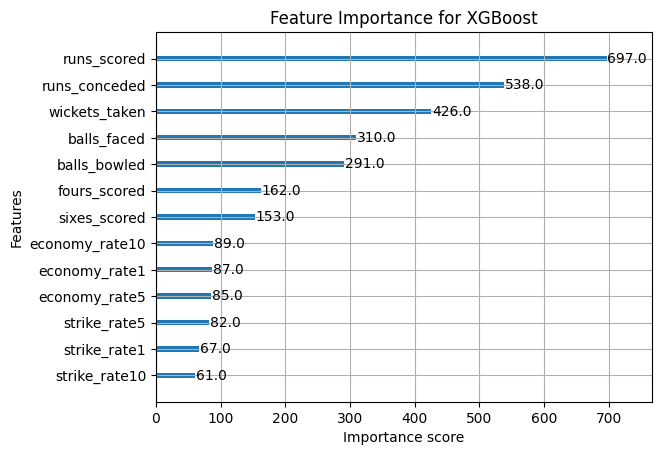

In [17]:
# importing modules for xgboost regression
import xgboost as xgb
# Creating DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Setting parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'rmse'
}
# Training the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)
# Making predictions
y_pred_xgb = model_xgb.predict(dtest)
# Evaluating the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')
# Plotting feature importance for XGBoost
xgb.plot_importance(model_xgb, importance_type='weight')
plt.title('Feature Importance for XGBoost')
plt.show()

In [19]:
# importing modules for pca
from sklearn.decomposition import PCA
# Performing PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
# removing values with NaN in the feature columns
X = X.dropna()
y = y.dropna()
X_pca = pca.fit_transform(X)
# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Adding target variable to PCA DataFrame
pca_df['fantasy_score_total'] = y.values
# Plotting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['fantasy_score_total'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Fantasy Score Total')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of T20 Player Profiles')
plt.show()

ValueError: Length of values (252665) does not match length of index (76638)

Explained variance ratio: [0.70199993 0.1884065 ]


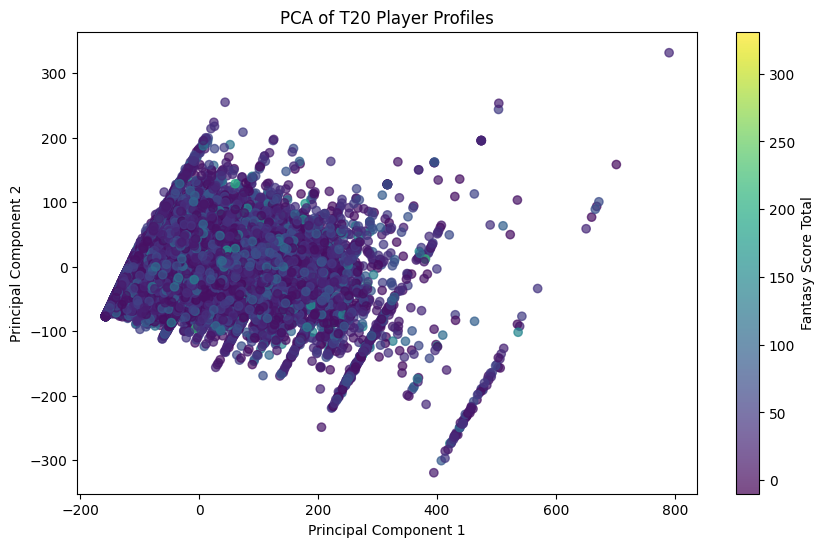

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Reset index if needed and keep player_id separately
if 'player_id' in X.index.names:
    X = X.reset_index()
if y.index.name is not None:
    y = y.reset_index(drop=True)

# Step 2: Align indices for concatenation
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Step 3: Save player_id separately
player_ids = X['player_id']

# Step 4: Combine X and y
data = pd.concat([X, y.rename('fantasy_score_total')], axis=1)

# Step 5: Drop NaN values
data = data.dropna()

# Step 6: Separate clean X and y
X_clean = data.drop(columns=['fantasy_score_total', 'player_id'])  # Drop non-numeric columns
y_clean = data['fantasy_score_total']
player_ids_clean = data['player_id']

# Step 7: PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# Step 8: Create PCA result DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['fantasy_score_total'] = y_clean.values
pca_df['player_id'] = player_ids_clean.values

# evaluating the PCA results
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 9: Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['fantasy_score_total'],
    cmap='viridis', alpha=0.7
)
plt.colorbar(scatter, label='Fantasy Score Total')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of T20 Player Profiles')
plt.show()


In [27]:
#importing libraries for rfe
from sklearn.feature_selection import RFE
# Using RFE with Decision Tree Regressor
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)
# Getting the ranking of features
ranking = selector.ranking_
# Creating a DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': feature_columns,
    'Ranking': ranking
}).sort_values(by='Ranking')
print("Feature Ranking using RFE with Decision Tree Regressor:")
print(feature_ranking_df)

Feature Ranking using RFE with Decision Tree Regressor:
           Feature  Ranking
0      runs_scored        1
4    runs_conceded        1
6    wickets_taken        1
11   economy_rate5        1
12  economy_rate10        1
10   economy_rate1        2
9    strike_rate10        3
8     strike_rate5        4
7     strike_rate1        5
5     balls_bowled        6
3     sixes_scored        7
2     fours_scored        8
1      balls_faced        9


c:\Users\Anshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


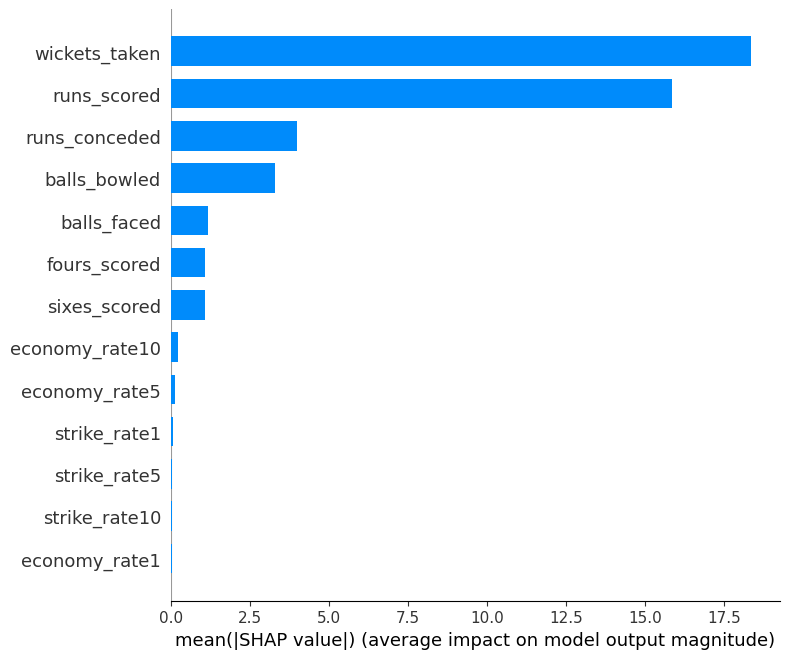

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [29]:
# importing modules for shap values
import shap
# Using SHAP values to explain the XGBoost model
explainer = shap.Explainer(model_xgb)
shap_values = explainer(dtest)
# Plotting SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
# Plotting SHAP values for individual predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
# Plotting SHAP dependence plot for a specific feature
shap.dependence_plot('runs_scored', shap_values.values, X_test, interaction_index='balls_faced')
# Plotting SHAP interaction values
shap_interaction_values = shap.TreeExplainer(model_xgb).shap_interaction_values(dtest)
# Plotting SHAP interaction values
shap.summary_plot(shap_interaction_values, X_test, plot_type="bar")
